In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import os
import datetime
import matplotlib.pyplot as plt

import xarray as xr
import sys
sys.path.append('../dataset')
from data.common import  CreateListOfLinkfilesInSpan
sys.path.append('../visualize')
import plotTestSetup as setup
from plotTest import plotDistribution

In [2]:
f = open('../path_to_data.txt', "r")
path_to_dataset = f.readline().rstrip("\n")
f.close() 

In [3]:
y_train = np.load(os.path.join(path_to_dataset, 'data/dataset-singles/train/y.npy'))
y_val = np.load(os.path.join(path_to_dataset, 'data/dataset-singles/validation/y.npy'))
y_test = np.load(os.path.join(path_to_dataset, 'data/dataset-singles/test/y.npy'))

In [100]:
def view_label(y):
    tot = len(y)
    print('total amount of values:\t', tot)
    rain = len(y[y > 0.0])
    print('rain fraction:\t', rain/tot)
    sorted_pos = np.sort(y[y>0.0])
    print('smallest non-zero values:\n', sorted_pos[:10])
    small_rain = len(y[(y > 0.0) & (y < 0.1)])
    print('amount of small rain:\t', small_rain)
    print('small rain fraction of rain:\t', small_rain/rain)

In [101]:
view_label(y_train)

total amount of values:	 83360758
rain fraction:	 0.06227764867493168
smallest non-zero values:
 [0.02761395 0.02761395 0.03103964 0.03103964 0.03140611 0.03340144
 0.03340144 0.03676442 0.03676442 0.0442377 ]
amount of small rain:	 143
small rain fraction of rain:	 2.7544961853117166e-05


In [102]:
view_label(y_val)

total amount of values:	 20805499
rain fraction:	 0.06095402950921773
smallest non-zero values:
 [0.03984801 0.03984801 0.04048919 0.04845629 0.04845629 0.053758
 0.053758   0.05937989 0.05937989 0.06032014]
amount of small rain:	 41
small rain fraction of rain:	 3.23298209479892e-05


In [103]:
view_label(y_test)

total amount of values:	 44869385
rain fraction:	 0.05963063679165649
smallest non-zero values:
 [0.0386392  0.0386392  0.04500788 0.04792185 0.0550799  0.0550799
 0.05520627 0.05781156 0.05888985 0.05888985]
amount of small rain:	 72
small rain fraction of rain:	 2.6909952571208594e-05


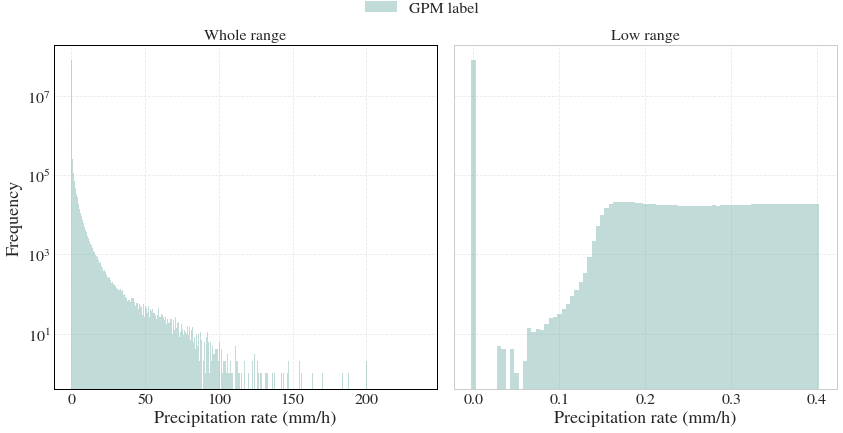

In [99]:
start = -0.1
end = 236.0
binsize = 0.1
num_of_bins = int(np.round((end-start)/binsize)+1)
bins = np.linspace(start,end,num_of_bins)

start2 = -0.0025
end2 = 0.4025
binsize2 = 0.005
num_of_bins2 = int(np.round((end2-start2)/binsize2)+1)
bins2 = np.linspace(start2,end2,num_of_bins2)

data_dict = {}
quantity = 'precipitation rate (mm/h)'
data_list = ['gpm']
for var in data_list:
    data_dict[var] = y_train

plotDistribution(data_dict, bins, 'gpm', 
                 [],
                 #crop_at=5, 
                 bins2=bins2,
                quantity=quantity,
                #filename='../plots/thesis/gpm_dist_train.pdf'
                )

In [65]:
#load dataset
combined_all = xr.open_dataset(os.path.join(path_to_dataset,'combined.nc'))
mask = np.zeros((combined_all.gauge_precip.values.shape[0], combined_all.gauge_precip.values.shape[1]))
mask[np.isnan(combined_all.gauge_precip.values)] = 1
mask[np.isnan(combined_all.HE_precip.values)] = 1
mask[np.isnan(combined_all.xception_posterior_mean.values)] = 1

# Make sure that comparison is done only where values are present in all datasets.
combined = combined_all.copy()
combined = combined.where(mask==0)

In [7]:
gauges = combined.gauge_precip.values[mask==0].flatten()

In [58]:
view_label(gauges)

total amount of values:	 278933
rain fraction:	 0.07989015283240061
smallest non-zero values:
 [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]


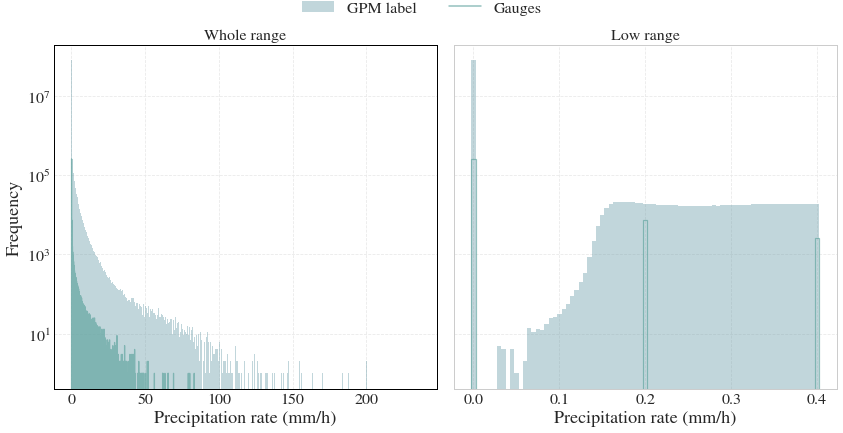

In [98]:
start = -0.1
end = 236.0
binsize = 0.1
num_of_bins = int(np.round((end-start)/binsize)+1)
bins = np.linspace(start,end,num_of_bins)

start2 = -0.0025
end2 = 0.4025
binsize2 = 0.005
num_of_bins2 = int(np.round((end2-start2)/binsize2)+1)
bins2 = np.linspace(start2,end2,num_of_bins2)

data_dict = {}
quantity = 'precipitation rate (mm/h)'
data_dict['gpm_var'] = y_train
data_dict['gauge_precip'] = gauges

plotDistribution(data_dict, bins, 'gpm_var', 
                 ['gauge_precip'],
                 #crop_at=5, 
                 bins2=bins2,
                quantity=quantity,
                #filename='../plots/thesis/gpmgauges_dist_train.pdf'
                )

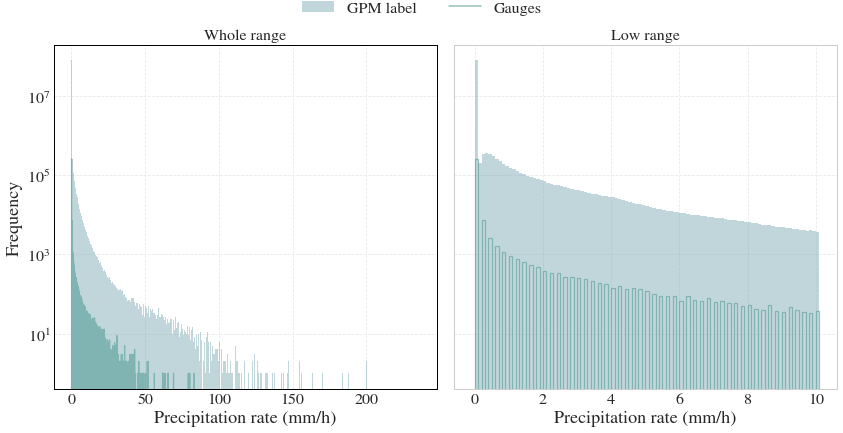

In [8]:
start = -0.1
end = 236.0
binsize = 0.1
num_of_bins = int(np.round((end-start)/binsize)+1)
bins = np.linspace(start,end,num_of_bins)


data_dict = {}
quantity = 'precipitation rate (mm/h)'
data_dict['gpm_var'] = y_train
data_dict['gauge_precip'] = gauges

plotDistribution(data_dict, bins, 'gpm_var', 
                 ['gauge_precip'],
                quantity=quantity,
                #filename='../plots/thesis/gpmgauge_dist_train.pdf'
                )

In [46]:
#Explore properties of reference data
dat = combined.gauge_precip.values[mask==0].flatten()
print('unique values in gauge data: \n', np.unique(dat))

unique values in gauge data: 
 [ 0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6
  2.8  3.   3.2  3.4  3.6  3.8  4.   4.2  4.4  4.6  4.8  5.   5.2  5.4
  5.6  5.8  6.   6.2  6.4  6.6  6.8  7.   7.2  7.4  7.6  7.8  8.   8.2
  8.4  8.6  8.8  9.   9.2  9.4  9.6  9.8 10.  10.2 10.4 10.6 10.8 11.
 11.2 11.4 11.6 11.8 12.  12.2 12.4 12.6 12.8 13.  13.2 13.4 13.6 13.8
 14.  14.2 14.4 14.6 14.8 15.  15.2 15.4 15.6 15.8 16.  16.2 16.4 16.6
 16.8 17.  17.2 17.4 17.6 17.8 18.  18.2 18.4 18.6 18.8 19.  19.2 19.4
 19.6 19.8 20.  20.2 20.4 20.6 20.8 21.  21.2 21.4 21.6 21.8 22.  22.2
 22.4 22.6 22.8 23.  23.2 23.4 23.6 23.8 24.  24.2 24.4 24.6 24.8 25.
 25.2 25.4 25.6 25.8 26.  26.2 26.4 26.6 26.8 27.  27.2 27.4 27.6 27.8
 28.  28.2 28.4 28.6 28.8 29.  29.2 29.4 29.6 29.8 30.  30.2 30.4 30.6
 30.8 31.  31.4 31.6 32.  32.2 32.4 32.6 33.2 33.6 33.8 34.  34.4 34.6
 34.8 35.  35.2 35.4 35.6 35.8 36.  36.2 36.4 36.6 36.8 37.  37.2 37.6
 38.4 38.6 38.8 39.  39.2 39.6 39.8 40.2 40.4 40